In [1]:
import random as ran
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math

In [2]:
h=1
tmax=100
tpoints=np.arange(0,tmax+1,h)

sample=10000
s_points=np.arange(0,sample+1,h)

In [3]:
first=1
p_same=2/3
p_change=1/3

In [4]:
ele=first
pos=first
position=[]

In [5]:
up=2
down=-2
right=1
left=-1

In [6]:
# loop for capture possibility
for i in s_points:
    position.append(pos)
    ele = 1
    # 2nd move        
    if ran.random() > p_change:
        ele += right
        test = right
    else:
        if ran.random() > 1/2:
            ele += 0*up
            test = up
        else:
            ele += 0*down
            test = down
    # 3rd move  
    if test == right:
        if ran.random() > p_change:
            ele += right
            test = right
        else:
            if ran.random() > 1/2:
                ele += 0*up
                test = up
            else:
                ele += 0*down
                test = down
    else:
        if test == up:
            if ran.random() > p_change:
                ele += 0*up
                test = up
            else:
                if ran.random() > 1/2:
                    ele += left
                    test = left
                else:
                    ele += right
                    test = right
        else:
            if test == down:
                if ran.random() > p_change:
                    ele += 0*down
                    test = down
                else:
                    if ran.random() > 1/2:
                        ele += left
                        test = left
                    else:
                        ele += right
                        test = right
        # 4th and later move
        for t in range(3,tmax+1):
            if test == right:
                if ran.random() > p_change:
                    ele += right
                    test = right
                else:
                    if ran.random() > 1/2:
                        ele += 0*up
                        test = up
                    else:
                        ele += 0*down
                        test = down
            else:
                if test == up:
                    if ran.random() > p_change:
                        ele += 0*up
                        test = up
                    else:
                        if ran.random() > 1/2:
                            ele += left
                            test = left
                        else:
                            ele += right
                            test = right
                else:
                    if test == down:
                        if ran.random() > p_change:
                            ele += 0*down
                            test = down
                        else:
                            if ran.random() > 1/2:
                                ele += left
                                test = left
                            else:
                                ele += right
                                test = right
                    else:
                        if test == left:
                            if ran.random() > p_change:
                                ele += left
                                test = left
                            else:
                                if ran.random() > 1/2:
                                    ele += 0*up
                                    test = up
                                else:
                                    ele += 0*down
                                    test = down
    pos = ele


In [7]:
print(position)

[1, 3, 2, 3, 3, 3, 2, -29, 2, 3, 3, 3, 2, 3, 7, 2, 2, 3, 3, 3, 3, -23, 3, 30, -10, -25, 7, 3, -12, 3, 7, 3, -10, 3, -12, -11, 3, 3, 3, 2, 3, 3, 3, 19, 12, 3, 3, -16, 3, 16, 9, 2, 3, 26, 3, -5, 3, 3, -11, 2, 11, 3, 2, 2, 3, 27, 3, 5, 2, 1, 2, 3, 3, -7, 3, 3, 2, 2, 12, 4, 3, 2, 3, 2, 2, -19, -32, 3, 3, 3, -12, 9, -13, 4, 9, 3, 21, 3, 10, -14, 2, 3, -6, 3, 3, 2, 2, 2, -4, 11, 2, 3, -25, -2, 3, 3, 4, 2, 17, 6, 3, 2, -9, -5, -12, 2, 3, 2, 5, 12, 3, -7, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, -9, 3, 2, 3, -28, -28, -2, 3, 0, 3, 3, 3, -12, 9, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 2, 35, 3, 3, 3, 3, 3, 2, -15, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 19, 3, 3, 3, 2, 3, 3, 10, 3, 3, 23, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, -11, 3, 3, -2, 2, -12, 2, 2, -23, 2, 3, 3, 3, 3, 3, -20, 3, 29, 3, 3, 2, -15, 2, -7, 2, 18, 2, 2, 2, 3, 3, 26, 3, 5, 1, 17, 3, 3, 3, 3, 2, 26, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 10, 2, 22, 2, 3, -25, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, -19, 2, 6, -8, 3, 3, 2, -9, 2, 3, 2, 18, 12, 2, -23, 2

In [8]:
position=position[1:sample+1]
print(len(position))

10000


In [9]:
reactor=[]
capture=[]
through=[]

num_r=0
num_c=0
num_t=0

size=np.arange(1,tmax+1,h)

In [11]:
for j in range(tmax):
    reactor.append(num_r)
    capture.append(num_c)
    through.append(num_t)
    x = size[j]
    nt=0
    nc=0
    nr=0
    for i in range(sample):
        if position[i] > x:
            nt += 1
        elif position[i] > 0:
            nc += 1
        else:
            nr += 1
    num_r = nr
    num_c = nc
    if nt == 0:
        num_t = 0.001
    else:
        num_t = nt

In [12]:
reactor_n=reactor[1:tmax+1]
capture_n=capture[1:tmax+1]
through_n=through[1:tmax+1]

In [13]:
print(reactor_n)
print(len(reactor_n))

[1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604, 1604]
100


In [14]:
print(capture_n)
print(len(capture_n))

[79, 2410, 6996, 7074, 7146, 7241, 7313, 7399, 7474, 7547, 7602, 7663, 7709, 7770, 7824, 7866, 7918, 7968, 8028, 8062, 8088, 8130, 8159, 8191, 8204, 8233, 8258, 8278, 8297, 8317, 8327, 8342, 8352, 8355, 8363, 8369, 8370, 8374, 8379, 8382, 8383, 8384, 8386, 8390, 8391, 8391, 8393, 8394, 8394, 8395, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396, 8396]
100


In [15]:
print(through_n)
print(len(through_n))

[8317, 5986, 1400, 1322, 1250, 1155, 1083, 997, 922, 849, 794, 733, 687, 626, 572, 530, 478, 428, 368, 334, 308, 266, 237, 205, 192, 163, 138, 118, 99, 79, 69, 54, 44, 41, 33, 27, 26, 22, 17, 14, 13, 12, 10, 6, 5, 5, 3, 2, 2, 1, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
100


In [16]:
print(size)
print(len(size))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
100


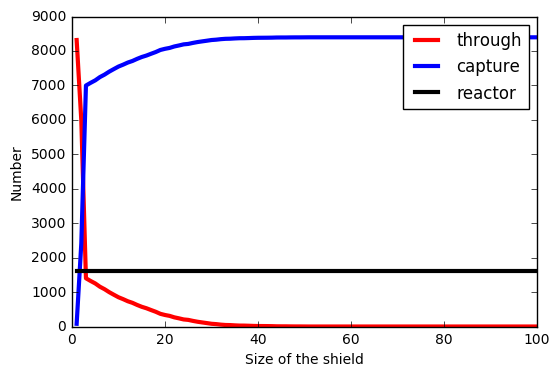

In [17]:
size_array=np.array(size)
through_array=np.array(through_n)
capture_array=np.array(capture_n)
reactor_array=np.array(reactor_n)
plt.plot(size_array,through_array,'-',label='through',color='red',linewidth=3.0)
plt.plot(size_array,capture_array,'-',label='capture',color='blue',linewidth=3.0)
plt.plot(size_array,reactor_array,'-',label='reactor',color='black',linewidth=3.0)
plt.legend()
plt.xlabel('Size of the shield')
plt.ylabel('Number')
plt.show()





In [18]:
P_through=through_array/sample
P_capture=capture_array/sample
P_reactor=reactor_array/sample

In [23]:
m_through,b_through=np.polyfit(size,np.log(P_through),1)
print(m_through,b_through)


fit_t=m_through*size+b_through
uncertainty_t=(1/tmax)*np.sum((fit_t-np.log(P_through))**2)#Standard Deviation
print(math.sqrt(uncertainty_t))

-0.193171593717 -0.539883940111
2.2727718935732653


In [22]:
m_capture,b_capture=np.polyfit(size,np.log(P_capture),1)
print(m_capture,b_capture)


fit_c=m_capture*size+b_capture
uncertainty_c=(1/tmax)*np.sum((fit_t-np.log(P_capture))**2)#Standard Deviation
print(math.sqrt(uncertainty_c))

0.00448286828165 -0.481378659558
11.557159198382195


In [24]:
m_reactor,b_reactor=np.polyfit(size,np.log(P_reactor),1)
print(m_reactor,b_reactor)


fit_t=m_reactor*size+b_reactor
uncertainty_r=(1/tmax)*np.sum((fit_t-np.log(P_reactor))**2)#Standard Deviation
print(math.sqrt(uncertainty_r))

1.2215383704e-17 -1.83008458355
7.112362866677809e-16
